In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df.shape

(1000, 5)

In [5]:
df = df.drop("User ID" , axis=1)

In [6]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000
std,10.707073,34488.341867,0.490547
min,18.000000,15000.000000,0.000000
25%,32.000000,46375.000000,0.000000
50%,40.000000,72000.000000,0.000000
75%,48.000000,90000.000000,1.000000
max,63.000000,152500.000000,1.000000


<Axes: ylabel='count'>

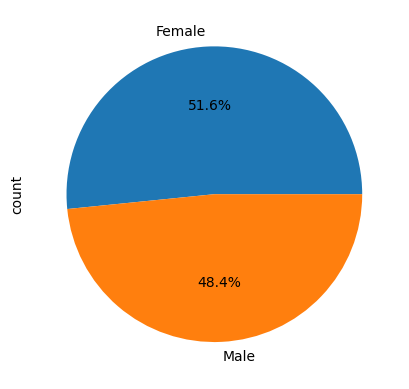

In [9]:
df["Gender"].value_counts().plot(kind="pie" ,autopct='%1.1f%%')

<Axes: ylabel='Density'>

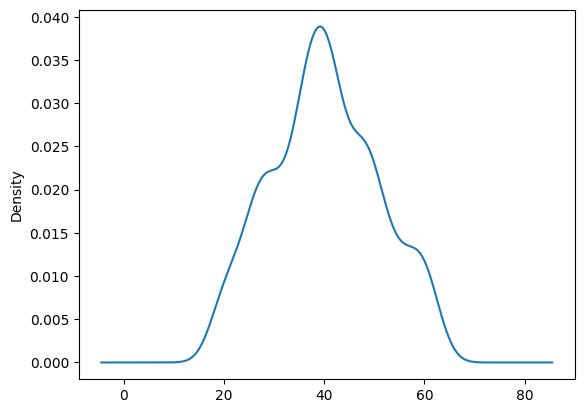

In [10]:
df["Age"].plot(kind="kde")

In [11]:
df["Age"].skew()

0.07868751311449813

<Axes: ylabel='Density'>

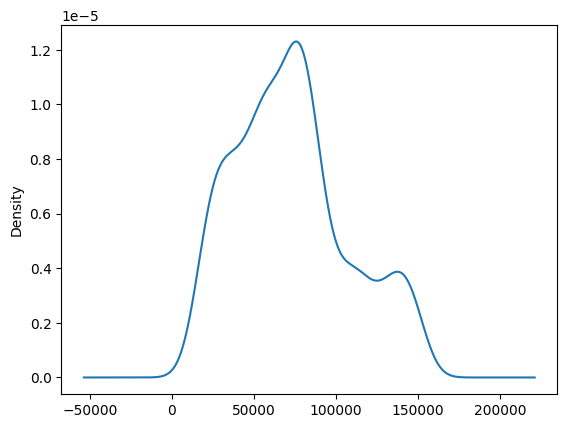

In [12]:
df["AnnualSalary"].plot(kind="kde")

In [13]:
df["AnnualSalary"].skew()

0.46823500918754063

<Axes: ylabel='count'>

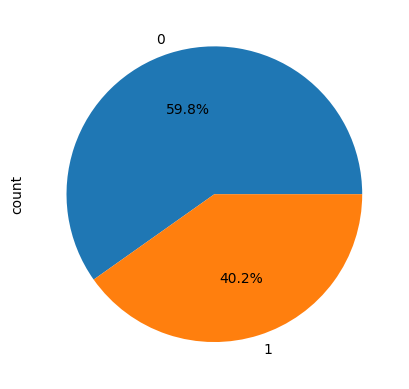

In [14]:
df["Purchased"].value_counts().plot(kind="pie" , autopct = '%1.1f%%')

In [15]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


<Axes: xlabel='Gender'>

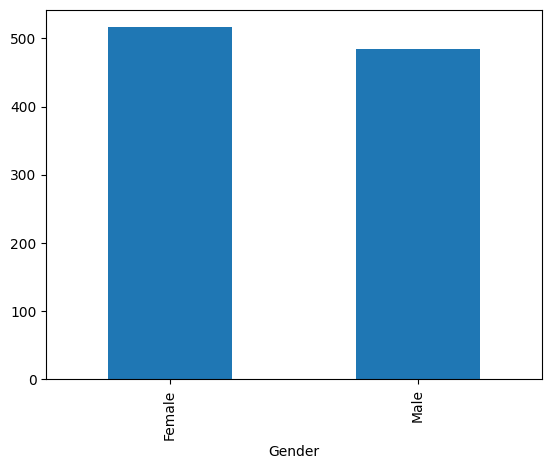

In [16]:
df.groupby(["Gender"])["Purchased"].count().plot(kind = "bar")

In [17]:
df.groupby("Purchased")["Age"].median()

Purchased
0    36.0
1    49.0
Name: Age, dtype: float64

In [18]:
df.groupby("Purchased")["AnnualSalary"].median()

Purchased
0    62500.0
1    92000.0
Name: AnnualSalary, dtype: float64

In [19]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [20]:
df = df.replace(["Male" , "Female"],[0,1])

C:\Users\jayde\AppData\Local\Temp\ipykernel_15844\2912029319.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(["Male" , "Female"],[0,1])


In [21]:
df_copy = df.copy()

In [22]:
sc = StandardScaler()
for i in df[["Age" ,"AnnualSalary"]]:
   df[i] = sc.fit_transform(df[i].values.reshape(-1,1))

In [23]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,0,-0.477120,-1.528498,0
1,0,-0.009905,-0.846767,0
2,0,0.831082,0.038032,0
3,0,-0.009905,1.009861,1
4,0,-1.411549,0.183081,0


In [24]:
from sklearn.metrics import silhouette_score
lst = []
ss = []

pca = PCA(2)
pca_encoded = pca.fit_transform(df)

for i in range(2,12):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    lst.append(kmeans.inertia_)

    y = kmeans.predict(df)
    s = silhouette_score(pca_encoded, y, random_state=0)
    ss.append(round(s, 5))

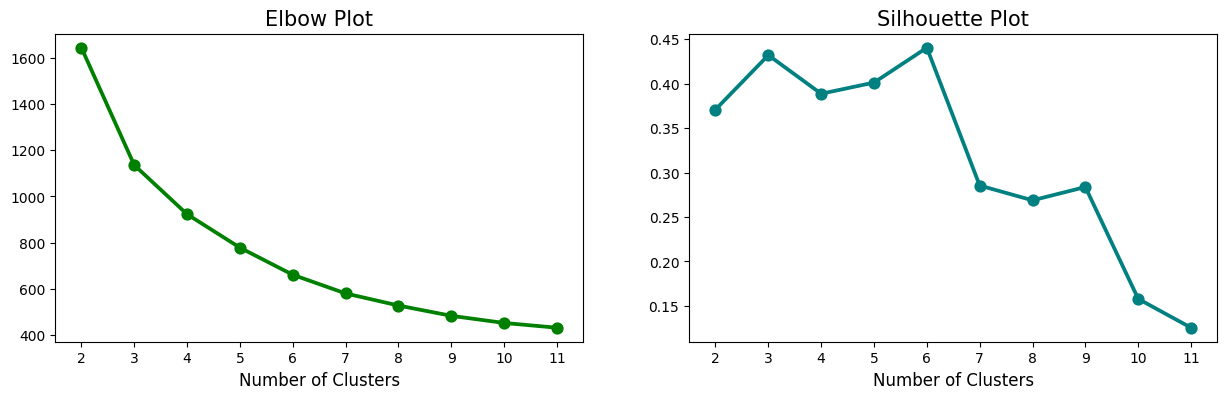

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))
sns.pointplot(x=list(range(2, 12)), y=lst, color='Green', ax = axs[0])
axs[0].set_title("Elbow Plot", size=15)
axs[0].set_xlabel("Number of Clusters", size=12)

sns.pointplot(x=list(range(2, 12)), y=ss, ax=axs[1], color='Teal')
axs[1].set_title("Silhouette Plot", size=15)
axs[1].set_xlabel("Number of Clusters", size=12)
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
df_copy["Clusters"] = kmeans.labels_

In [27]:
pca = PCA(2)
pca_df = pca.fit_transform(df)
centers = pca.transform(kmeans.cluster_centers_)

C:\Users\jayde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [28]:
centers

array([[ 1.04517925, -0.15301773],
       [-0.77886831,  0.11402892]])

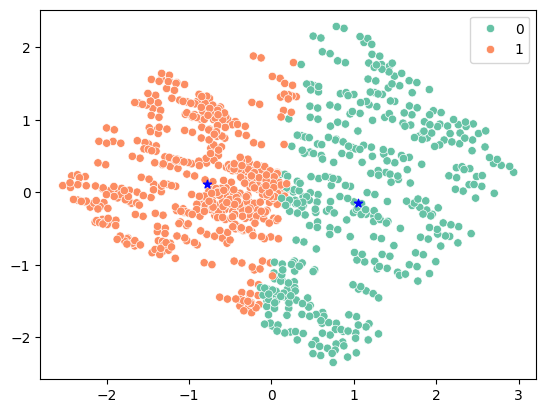

In [29]:
sns.scatterplot(x = pca_df[:,0] , y = pca_df[:,1] , palette = "Set2" ,hue=kmeans.labels_)
plt.scatter(centers[:,0] , centers[:,1] , marker="*" ,color="blue")

In [30]:
data_pivot = df_copy.groupby('Clusters').mean().T
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

C:\Users\jayde\AppData\Local\Temp\ipykernel_15844\2104332164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')
C:\Users\jayde\AppData\Local\Temp\ipykernel_15844\2104332164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')


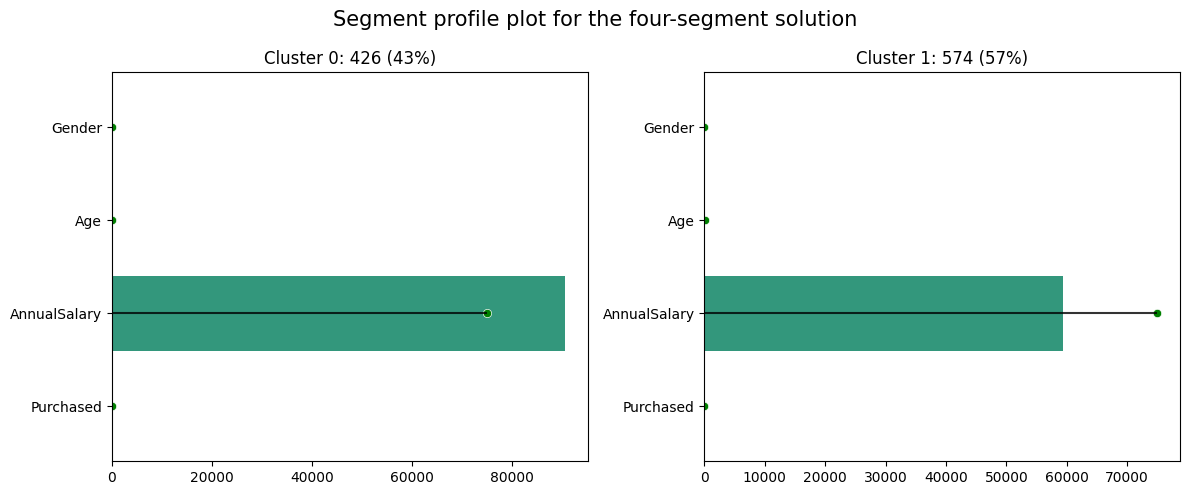

In [35]:
plt.figure(figsize = (12,5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index, palette='viridis')
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'green')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='black', alpha = 0.8)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {df_copy['Clusters'].value_counts()[i]} ({df_copy['Clusters'].value_counts()[i]*100/len(df_copy):.0f}%)")

plt.suptitle("Segment profile plot for the four-segment solution", fontsize = 15)
plt.tight_layout()
plt.show()

In [32]:
df_copy.groupby("Clusters")[["Age","AnnualSalary"]].median()

,Age,AnnualSalary
Clusters,,
0,49.0,92000.0
1,35.0,60500.0


In [33]:
df_copy.groupby("Clusters")[["Gender","Purchased"]].agg(lambda x : x.mode()[0])

,Gender,Purchased
Clusters,,
0,1,1
1,0,0
